<a href="https://colab.research.google.com/github/kriskirla/AllProjects/blob/master/Algotrading/Stock_Forecast_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program will predict the stock for a specific day using ML

In [ ]:
!pip install yfinance

In [4]:
# Import libaries
from sklearn.svm import SVR
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
ticker = "CARR";

# Get data from yahoo finance
df = yf.download(ticker, start="2021-02-01", end=dt.today().strftime('%Y-%m-%d'))
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-01,39.200001,39.450001,38.549999,38.660000,38.660000,4731700
2021-02-02,39.119999,39.400002,38.430000,38.480000,38.480000,2902000
2021-02-03,38.299999,38.660000,37.956001,38.150002,38.150002,2987900
2021-02-04,38.369999,38.529999,37.860001,38.330002,38.330002,3439000
2021-02-05,38.000000,39.990002,38.000000,39.150002,39.150002,4408700
2021-02-08,39.529999,40.119999,39.340000,39.700001,39.700001,4544800
2021-02-09,37.099998,38.279999,36.950001,37.250000,37.250000,12941200
2021-02-10,37.660000,37.950001,36.799999,37.189999,37.189999,7926400
2021-02-11,37.299999,37.474998,36.630001,37.200001,37.200001,11064400


In [9]:
# Get the last row of data to test the correctness
actual_price = df.tail(1)
actual_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-12,37.0,37.400002,36.759998,37.279999,37.279999,5471200


In [10]:
# Get the data except for the last row
df = df.head(len(df) - 1)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-01,39.200001,39.450001,38.549999,38.660000,38.660000,4731700
2021-02-02,39.119999,39.400002,38.430000,38.480000,38.480000,2902000
2021-02-03,38.299999,38.660000,37.956001,38.150002,38.150002,2987900
2021-02-04,38.369999,38.529999,37.860001,38.330002,38.330002,3439000
2021-02-05,38.000000,39.990002,38.000000,39.150002,39.150002,4408700
2021-02-08,39.529999,40.119999,39.340000,39.700001,39.700001,4544800
2021-02-09,37.099998,38.279999,36.950001,37.250000,37.250000,12941200
2021-02-10,37.660000,37.950001,36.799999,37.189999,37.189999,7926400
2021-02-11,37.299999,37.474998,36.630001,37.200001,37.200001,11064400


In [11]:
# Create independant dataset and dependant dataset
df_days = df.index
df_adj_close = df.loc[:, 'Adj Close']

days = [[i.day] for i in df_days ]
adj_close_price = [float(price) for price in df_adj_close]

In [12]:
# Linear Model
lin_svr = SVR(kernel='linear', C=1000)
lin_svr.fit(days, adj_close_price)
# Polynomial Model
poly_svr = SVR(kernel='poly', C=1000, degree=2)
poly_svr.fit(days, adj_close_price)
# Radial Basis Function Model
rbf_svr = SVR(kernel='rbf', C=1000, gamma=0.85)
rbf_svr.fit(days, adj_close_price)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

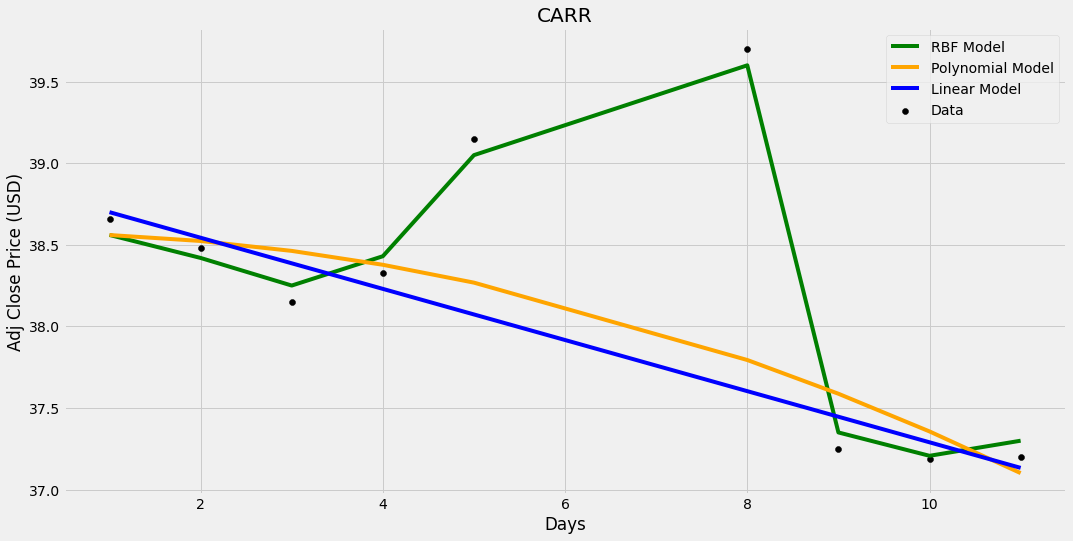

In [13]:
# Plot the models
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_price, color='black', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='blue', label='Linear Model')
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Adj Close Price (USD)')
plt.legend()
plt.show()

In [14]:
# Show the predicted price for the given day
day = [[30]]

print(f"Predicted price using RBF Model: {rbf_svr.predict(day)}")
print(f"Predicted price using Polynomial Model: {poly_svr.predict(day)}")
print(f"Predicted price using Linear Model: {lin_svr.predict(day)}")
print(f"Actual Price: {actual_price.iloc[0]['Adj Close']}")

Predicted price using RBF Model: [38.34022619]
Predicted price using Polynomial Model: [27.63247047]
Predicted price using Linear Model: [34.15665461]
Actual Price: 37.279998779296875
